In [186]:
import numpy as np
import cv2 
import matplotlib.pylab as plt
import matplotlib.image as mpimg

from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
import math

In [187]:
# Q1: This is the filtering function 
def my_imfilter(input_image, conv_kernel):  
    
    conv_output = input_image.copy()
    
    # Image dimension
    x_image = input_image.shape[0]
    y_image = input_image.shape[1]
    
    # Kernel dimension
    x_kern = conv_kernel.shape[0]
    y_kern = conv_kernel.shape[1]
    
    # Padding dimension
    x_pad = int((x_kern - 1)/2)
    y_pad = int((y_kern - 1)/2)
        
    # Add zero padding to the input image
    input_image_pad = np.zeros((x_image + 2*x_pad, y_image + 2*y_pad, 3))
    input_image_pad[x_pad: x_image + x_pad, y_pad: y_image + y_pad] = input_image
    
    # Initialize the output image of convolution
    conv_output = np.zeros_like(input_image)

    # For every pixel of the image, do multiplication with the kernel
    for k in range(len(input_image[0][0])):
        for m in range(input_image.shape[1]):
            for n in range(input_image.shape[0]):
                conv_output[m][n][k] = sum(sum(np.multiply(conv_kernel, input_image_pad[m: m + x_kern, n: n + y_kern, k])))

    return conv_output


True

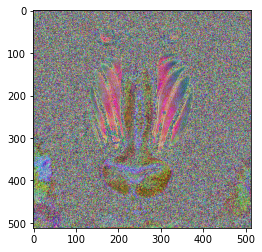

In [195]:
## Read the image
img = cv2.imread("baboon.png")
plt.imshow(img)


# choose a filter
kernel_edge_detect = np.array([[-1,-1,-1, -1, -1], [-1,-1,8,-1,-1], [-1,-1,-1,-1,-1]])

# Calling the imfilter function.
convolved_image = my_imfilter(img, kernel_edge_detect)

# display image
plt.imshow(convolved_image)


cv2.imwrite('convolved_image.png',convolved_image)  

In [208]:
# Q2: Creating hybrid images

import numpy
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math
import imageio

# Calculating the gaussian coeff.
def calgauss(i,j, cI, cJ, sigval, hpass):
    cf = math.exp(-1.0 * ((i - cI)**2 + (j - cJ)**2) / (2 * sigval**2))

    if highPass:
        return (1 - cf)
    else: 
        return cf

# Creating a gaussian filter.
def Gauss_filter(nR, nC, sigval, hpass = True):
    cI = int(nR/2) + 1 if nR % 2 == 1 else int(nR/2)
    cJ = int(nC/2) + 1 if nC % 2 == 1 else int(nC/2)
    
    gauss_filter = numpy.array([[calgauss(i,j, cI, cJ, sigval, hpass) for j in range(nC)] for i in range(nR)])
    
    return gauss_filter


def DFT(image_arr, filter_arr):
    DFT_shift = fftshift(fft2(image_arr))
    
    DFT_filter = DFT_shift * filter_arr

    freq_shift = ifft2(ifftshift(DFT_filter))
    return freq_shift


def convert_hybrid(img_hf, img_lf, sigmaH, sigmaL):
    n1,m1 = img_hf.shape
    high_passed = DFT(img_hf, Gauss_filter(n1, m1, sigmaH, hpass = False))

    n2,m2 = img_lf.shape
    low_passed = DFT(img_lf, Gauss_filter(n2, m2, sigmaL, hpass = False))
    
    return (high_passed + low_passed)
    

(398, 363, 3)
(398, 363, 3)


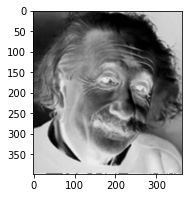

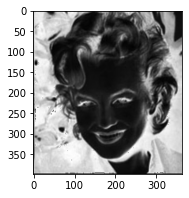

In [209]:
# Q2: Creating hybrid images
from PIL import Image

image1 = Image.open("einstein.png")
w1, h1 = image1.size

image2 = Image.open("marilyn.png")

res_image2 = image2.resize((w1,h1))
res_image2.save('resize_marilyn.png')

image1 = cv2.imread("einstein.png")
image1 = image1[...,:4]
cv2.imwrite('reduced_einstein.png',image1) 
image2 = cv2.imread("resize_marilyn.png")
image2 = image2[...,:4]
cv2.imwrite('reduced_marilyn.png',image2) 

print(image1.shape)
print(image2.shape)

plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

In [210]:
einstein = cv2.imread("reduced_einstein.png",0)
marilyn = cv2.imread("reduced_marilyn.png",0)

img_hybrid = convert_hybrid(einstein, marilyn, 20, 15)    
imageio.imwrite('marilyn-einstein.png', img_hybrid)

Lossy conversion from complex128 to uint8. Range [(-138.47781269248574+2.09256608755509j), (185.31231282601158+2.231499154177584j)]. Convert image to uint8 prior to saving to suppress this warning.
